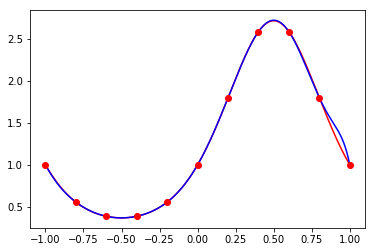

In [1]:
%matplotlib inline
from numpy import *
from pylab import *
N=10
#N이 커질수록 두 그래프가 비슷해짐
x=linspace(-1,1,N+1)
f=exp(sin(pi*x))
m=1000
xx=linspace(-1,1,m)
l=ones((N+1,m))
for i in range(N+1):
    for j in range(N+1):
        if i!=j:
            l[i,:]=l[i,:]*(xx-x[j])/(x[i]-x[j])
f_e=exp(sin(pi*xx))
f_N=0*xx
for i in range(N+1):
    f_N=f_N + f[i]*l[i,:]
plot(xx,f_e,'-r',xx,f_N,'-b')
plot(x,f,'ro')
show()
#-1과 1 사이에서 Truth 값 N개를 받아서 F와 가장 비슷한 함수 f_N을 예측함

In [25]:
from numpy import *
from pylab import *
N=20
x=linspace(-1,1,N+1)
f=exp(sin(pi*x))
m=1000
xx=linspace(-1,1,m)
l=ones((N+1,m))
for i in range(N+1):
    for j in range(N+1):
        if i!=j:
            l[i,:]=l[i,:]*(xx-x[j])/(x[i]-x[j])
f_e=exp(sin(pi*xx))
f_N=0*xx
for i in range(N+1):
    f_N=f_N + f[i]*l[i,:]
error=max(abs(f_e - f_N))
print(error)
#truth function f와 predict function f_N의 차이(에러) 중 가장 큰 값을 출력

0.00439418206469


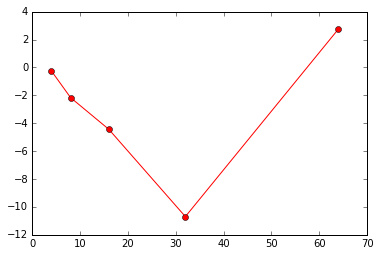

In [44]:
%matplotlib inline
from numpy import *
from pylab import *
N=2
E=[]
NN=[]
for i in range(5):
    N=2*N
    x=linspace(-1,1,N+1)
    f=exp(sin(pi*x))
    m=1000
    xx=linspace(-1,1,m)
    l=ones((N+1,m))
    for i in range(N+1):
        for j in range(N+1):
            if i!=j:
                l[i,:]=l[i,:]*(xx-x[j])/(x[i]-x[j])
    f_e=exp(sin(pi*xx))
    f_N=0*xx
    for i in range(N+1):
        f_N=f_N + f[i]*l[i,:]
    error=max(abs(f_e - f_N))
    E.append(error)
    NN.append(N)
plot(NN,log(E),'-or')
show()
#에러의 로그값을 그림

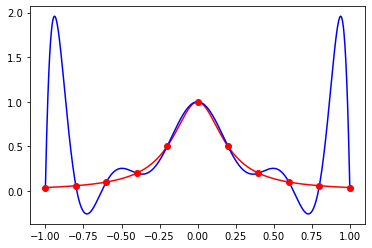

In [22]:
from numpy import *
from pylab import *
N=10
#N이 커지면 가운데는 비슷해지지만 양 끝에서 over-fitting이 생김
x=linspace(-1,1,N+1)
f=1/(1+25*x**2)
m=1000
xx=linspace(-1,1,m)
l=ones((N+1,m))
for i in range(N+1):
    for j in range(N+1):
        if i!=j:
            l[i,:]=l[i,:]*(xx-x[j])/(x[i]-x[j])
f_e=1/(1+25*xx**2)
f_N=0*xx
for i in range(N+1):
    f_N=f_N + f[i]*l[i,:]
plot(xx,f_e,'-r',xx,f_N,'-b')
plot(x,f,'ro')
show()
#맨 위 코드에서 truth function을 바꾼것

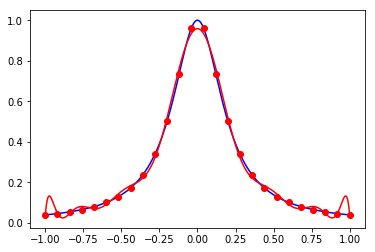

In [24]:
from numpy import *
from pylab import *
N=25
m=15
x=linspace(-1,1,N+1)
f=1/(1+25*x**2)
X=zeros((N+1,m+1))
for i in range(m+1):
    X[:,i] = x**i
X_t=transpose(X)
M=matmul(X_t,X)
RHS=matmul(X_t,f)
a=matmul(inv(M),RHS)
Xi=linspace(-1,1,1000)
f_t=1/(1+25*Xi**2)
f_N=0*Xi
for i in range(m+1):
    f_N=f_N + a[i]*Xi**i
plot(Xi,f_t,'-b')
plot(Xi,f_N,'-r')
plot(x,f,'or')
show()
#L2 minimization 을 이용해 f를 predict함

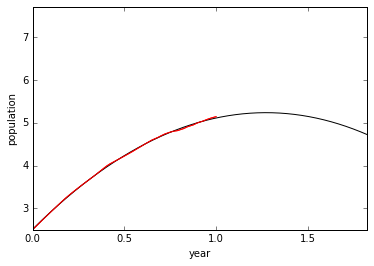

4.72425074902


In [12]:
%matplotlib inline
from numpy import *
from pylab import *
pop=loadtxt('Korean_Population_Data_txt.txt')
y=pop[:,0]
p=pop[:,1]
y=(1/57)*(y-1960)
p=p/10000000
plot(y,p,'r-')
xlabel('year')
ylabel('population')
y_p=(1/57)*(2064-1960)
axis((0,y_p,min(p),1.5*max(p)))
N=57
m=2
#m을 이보다 크게 잡으면 over-fitting이 생김
X=zeros((N+1,m+1))
x=y
f=p
for i in range(m+1):
    X[:,i]=x**i
X_t=transpose(X)
M=matmul(X_t,X)
RHS=matmul(X_t,f)
a=matmul(inv(M),RHS)
Xi=linspace(0,y_p,1000)
f_N=0*Xi
for i in range(m+1):
    f_N=f_N + a[i]*Xi**i
plot(Xi,f_N,'-k')
plot(x,f,'-r')
show()
print(f_N[-1])
#L2 minimization 을 이용해 2064년 한국의 인구수를 예측한것

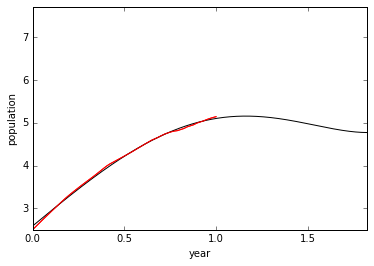

4.77407480746


In [52]:
%matplotlib inline
from numpy import *
from pylab import *
pop=loadtxt('Korean_Population_Data_txt.txt')
y=pop[:,0]
p=pop[:,1]
y=(1/57)*(y-1960)
p=p/10000000
plot(y,p,'r-')
xlabel('year')
ylabel('population')
y_p=(1/57)*(2064-1960)
axis((0,y_p,min(p),1.5*max(p)))
N=57
m=5
X=zeros((N+1,m+1))
x=y
f=p
for i in range(m+1):
    X[:,i]=x**i
X_t=transpose(X)
e=zeros((m+1,m+1))
d=0.0198
for i in range(m+1):
    e[i,i]=1
e=d*e
M=matmul(X_t,X)+e
RHS=matmul(X_t,f)
a=matmul(inv(M),RHS)
Xi=linspace(0,y_p,1000)
f_N=0*Xi
for i in range(m+1):
    f_N=f_N + a[i]*Xi**i
plot(Xi,f_N,'-k')
plot(x,f,'-r')
show()
print(f_N[-1])
#X*X_t matrix에 e를 더해서 위보다 오차를 줄임

[-0.2792 -0.2792  0.2792  0.2792]
91.67999999999999


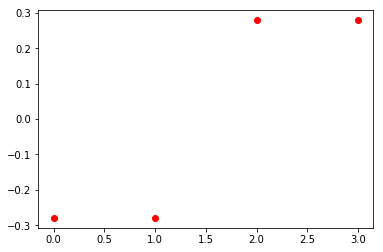

In [2]:
%matplotlib inline
from numpy import *
from pylab import *
D=loadtxt('Scale_Data.txt')
#2열은 왼쪽의 무게, 3열은 왼쪽의 줄길이, 4열은 오른쪽무게, 5열은 오른쪽줄길이, 1열은 밸런스 데이터
Y=D[:,0]
s=len(Y)
X=zeros((4,s))
for i in range(s):
    X[:,i]=D[i,1:5]
X_t=transpose(X)
XY=matmul(X,Y)
XX_t=matmul(X,X_t)
w=matmul(inv(XX_t),XY)
print(w)
plot(w,'or')
#L2 minimization을 이용해 w를 계산
A=0
for i in range(s):
    Xw=matmul(w,X[:,i])
    if Xw >= 0.02:
        pre = 1
    elif Xw <= -0.02:
        pre= -1
    else:
        pre=0
    if pre == Y[i]:
        A=A+1
#오차 범위를 +-0.02로 하여 맞으면 A에 1을 더해나가서 전체 error를 계산
A=A/s*100
#error의 평균의 백분위
print(A)

In [3]:
from numpy import *
from pylab import *
import pandas as pd

D = np.loadtxt('Scale_Data.txt')
Y = D[:, 0]
X = D[:,1:]
def f(x): return 1/(1 + np.exp(-x))
def d(w1, w2): return np.sqrt(sum((w1-w2)*(w1-w2)))


W0 = [0,0,0,0]
Xt = np.transpose(X)
lr = 0.001
s=len(Y)

for i in range(500):
    a = np.matmul(X, W0)
    b = (Y - f(a))*(-f(a))*(1 - f(a))
    grad = np.matmul(Xt, b)    
    W = W0 - lr*grad
    
    if d(W, W0) <= 0.0001:
        W = W0
        break
    W0 = W
#W_n과 W_n+1의 차이가 0.0001보다 작아질때까지 돌리고 작아지면 W_n+1을 출력
print(W)

[-2.42960094 -2.42960094  2.18795062  2.18795062]


In [3]:
A = 0
for i in range(0,len(Y)):
    XW=matmul(transpose(X[i,:]),W)
    f = 1/(1+exp(-XW))
    if f >= 0.55 :
        yhat = 1
    elif f <= 0.45:
        yhat = -1
    else :
        yhat = 0
    if not(yhat == Y[i]):
        A = A+1

Acc = (1-A/len(Y))*100
#추측이 틀리면 1을 더해나가서 Accuracy 계산
print(Acc)

87.36


In [48]:
from random import *
def r_order(N):
    R0 = []
    for i in range(N):
        while len(R0)<=i:
            tmp = randint(0,N-1)
            if not(tmp in R0):
                R0.append(tmp)
            else :
                tmp=randint(0,N-1)
    return R0

r_order(10)

[4, 8, 6, 7, 5, 9, 3, 2, 1, 0]

In [5]:
from numpy import *
from pylab import *
import pandas as pd
from matplotlib.pyplot import *

D = loadtxt('Scale_Data.txt')
Y = D[:, 0]
X = D[:,1:]
def d(w1, w2): return sqrt(sum((w1-w2)*(w1-w2)))

W0 = [0, 0, 0, 0]
Xt = transpose(X)
l = 0.01
dx = 0.0001
W1=[]
acc1=[]
for i in range(5):
    l=l/2
    dx=dx/2
    for j in range(500):
        a = matmul(X,W0)
        f = 1/(1 + exp(-a))
        b = (Y - f)*(-f)*(1 - f)
        grad = matmul(Xt, b)    
        W = W0 - l*grad
        if d(W, W0) < dx:
            W = W0
            break
        W0 = W
        A=0
    for j in range(0,len(Y)):
        XW=matmul(transpose(X[i,:]),W)
        f = 1/((1+exp(-XW)))
        if f>= 0.55:
            yhat = 1
        elif f<=0.45:
            yhat = -1
        else:
            yhat = 0
        if(yhat != Y[i]):
             A= A+1
    W1.append(W)
    acc = (1-A/len(Y))*100
    acc1.append(acc)

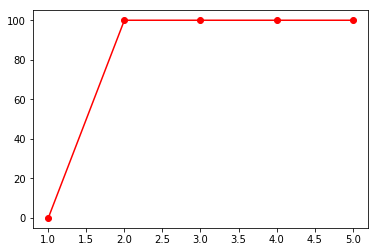

In [6]:
plot([1,2,3,4,5],acc1,'-or')

show()

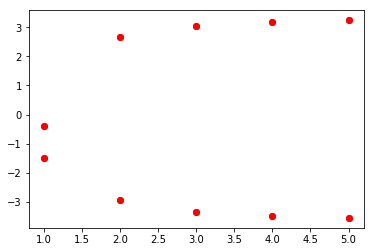

In [7]:
plot([1,2,3,4,5],W1,'or')
show()

[-0.66582061 -0.67766014  0.46662873  0.48564646]


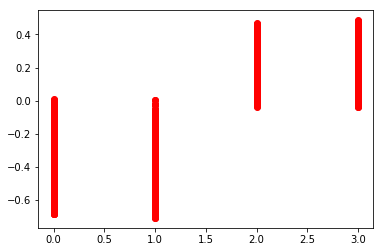

In [82]:
%matplotlib inline
from numpy import *
from pylab import *
from random import *
def r_order(N):
    R0 = []
    for i in range(N):
        while len(R0)<=i:
            tmp = randint(0,N-1)
            if not(tmp in R0):
                R0.append(tmp)
            else :
                tmp=randint(0,N-1)
    return R0
D = loadtxt('Scale_Data.txt')
Y = D[:, 0]
X = D[:,1:]

l=0.015
W0=[0,0,0,0]
n=len(Y)
R0=r_order(n)
X=transpose(X)

for i in R0:
    xi=X[:,i]
    yi=Y[i]
    wxi=matmul(W0,xi)
    f=1/(1+exp(-wxi))
    gn=(yi-f)*(-f)*(1-f)*xi
    w1=W0-l*gn
    figure(1)
    plot(w1,'or')
    W0=w1
print(w1)
show()

In [42]:
print(max(R0))

624


In [61]:
acc=0
n=len(Y)

for i in range(n):
    xi=X[:,i]
    yi=Y[i]
    wxi=matmul(w1,xi)
    f=1/(1+exp(-wxi))
    if f>= 0.51:
        yhat=1
    elif f <= 0.49:
        yhat=-1
    else:
        yhat=0
    if yhat == yi:
        acc=acc+1
acc=(acc/n)*100
print(acc)

69.44


In [46]:
from numpy import *
from pylab import *
from random import *
def r_order(N):
    R0 = []
    for i in range(N):
        while len(R0)<=i:
            tmp = randint(0,N-1)
            if not(tmp in R0):
                R0.append(tmp)
            else :
                tmp=randint(0,N-1)
    return R0
D = loadtxt('Scale_Data.txt')
Y = D[:, 0]
X = D[:,1:]

l=0.03
W0=[0,0,0,0]
n=len(Y)
R0=r_order(n)
X=transpose(X)
A=0

W1=[]
acc1=[]
for j in range(5):
    l=l/2
    for i in R0:
        xi=X[:,i]
        yi=Y[i]
        wxi=matmul(W0,xi)
        f=1/(1+exp(-wxi))
        gn=(yi-f)*(-f)*(1-f)*xi
        w1=W0-l*gn
        W0=w1
        acc=0
        n=len(Y)

    for i in range(n):
        xi=X[:,i]
        yi=Y[i]
        wxi=matmul(w1,xi)
        f=1/(1+exp(-wxi))
        if f>= 0.51:
            yhat=1
        elif f <= 0.49:
            yhat=-1
        else:
            yhat=0
        if yhat == yi:
            acc=acc+1
    acc=(acc/n)*100
    W1.append(w1)
    acc1.append(acc)
print(acc1)

[65.12, 72.64, 76.0, 77.28, 77.44]


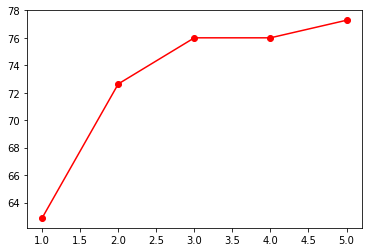

In [10]:
%matplotlib inline
plot([1,2,3,4,5],acc1,'-or')

show()

In [5]:
from numpy import *
from pylab import *
from random import *
D=loadtxt('Muffin_Cupcake.txt')
Y=D[:,0]
X=zeros((D.shape[1]-1,len(Y)))
for i in range(len(Y)):
    X[:, i] = D[i, 1:]
    
    ### normalization
    X[:, i] = X[:, i] / np.mean(X[:, i])

Xt=transpose(X)
def f(x): return 1/(1 + exp(-x))
def d(w1, w2): return sqrt(sum((w1-w2)*(w1-w2)))

def Accuracy(W):
    A = 0
    N = len(Y)
    eps = 0
    for (y_hat, y) in zip(f(np.matmul(Xt, W)), Y):
        if y_hat >= .5 + eps and y == 1:
            A += 1
        elif y_hat < .5 - eps and y == 0:
            A += 1
    print(f'Accuracy : {A / N *100}%')
    return A / N *100

In [6]:
W = [0 for i in range(D.shape[1] - 1)]
lr = .001 #[.05, .005, .0005, ]
eps = .0001 #[.001, .0001, .00001]

while True:
    _W = W
    a = np.matmul(Xt, W)
    b = (Y - f(a))*(-f(a))*(1 - f(a))
    grad = np.matmul(X, b)    
    W = W - lr*grad
    if d(_W, W) < eps:
        break

_W = W
print(W)
Accuracy(W)

[ 2.04459668 -0.73751924 -2.90702252 -1.17099127 -1.3225222  -0.4068393
 -0.23033386  0.        ]
Accuracy : 95.0%


95.0

In [7]:
def rndList(N):
    rndList = [i for i in range(N)]
    while rndList != []:
        yield rndList.pop(np.random.randint(0, len(rndList)))

lr  = .01

W = [0 for i in range(X.shape[0])]
N = len(Y)

WList = []

for j in range(20):
    for i in rndList(N):
        xi = X[:, i]
        a = np.matmul(xi, W)
        W = W - lr * (Y[i] - f(a)) * (1 - f(a)) * (-f(a)) * xi
    Accuracy(W)
    WList.append(W)

Accuracy : 50.0%
Accuracy : 50.0%
Accuracy : 55.00000000000001%
Accuracy : 55.00000000000001%
Accuracy : 55.00000000000001%
Accuracy : 55.00000000000001%
Accuracy : 60.0%
Accuracy : 70.0%
Accuracy : 85.0%
Accuracy : 85.0%
Accuracy : 85.0%
Accuracy : 90.0%
Accuracy : 90.0%
Accuracy : 90.0%
Accuracy : 90.0%
Accuracy : 90.0%
Accuracy : 90.0%
Accuracy : 95.0%
Accuracy : 95.0%
Accuracy : 95.0%


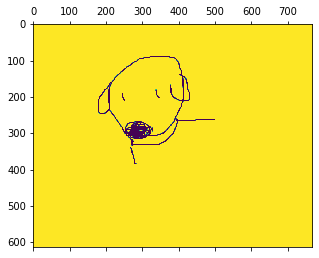

In [10]:
from numpy import *
from pylab import *
from PIL import *
test=Image.open("dog.png")
dog=array(test)
matshow(dog[:,:,0])
d=dog[:,:,0]

In [11]:
M = 8
ByMMslice = [ a // M for a in dog.shape[:2]]
X = np.zeros((M, M))
r, c = ByMMslice[0], ByMMslice[1]
for i in range(M):
    for j in range(M):
        X[i, j] = sum(d[r * i : r * (i + 1),  c * j : c * (j + 1)])

In [12]:
X

array([[1860480., 1860480., 1860480., 1860480., 1860480., 1860480.,
        1860480., 1860480.],
       [1860480., 1860480., 1795839., 1784618., 1794350., 1860480.,
        1860480., 1860480.],
       [1860480., 1827481., 1750994., 1811699., 1716540., 1860480.,
        1860480., 1860480.],
       [1860480., 1837426., 1537450., 1583503., 1717481., 1846248.,
        1860480., 1860480.],
       [1860480., 1860480., 1699371., 1663633., 1860305., 1860480.,
        1860480., 1860480.],
       [1860480., 1860480., 1852511., 1860480., 1860480., 1860480.,
        1860480., 1860480.],
       [1860480., 1860480., 1860480., 1860480., 1860480., 1860480.,
        1860480., 1860480.],
       [1860480., 1860480., 1860480., 1860480., 1860480., 1860480.,
        1860480., 1860480.]])

In [129]:
from numpy import *
from pylab import *
from PIL import *
#dog
m=40
X=zeros((m*m,70))
Y=zeros(70)
for i in range(70):
    i_n=i+20
    n=str(i_n)
    test=Image.open('dog'+n+'.png')
    tmp=array(test)
    d=tmp[:,:,0]
    nr=len(d[:,0])
    nc=len(d[0,:])
    M = 40
    ByMMslice = [ a // M for a in d.shape[:2]]
    d8 = zeros((M, M))
    r, c = ByMMslice[0], ByMMslice[1]
    for q in range(M):
        for j in range(M):
            d8[q, j] = sum(d[r * q : r * (q + 1),  c * j : c * (j + 1)])
    x=zeros(m*m)
    i_nx=-1
    for k in range(m):
        for l in range(m):
            i_nx=i_nx+1
            x[i_nx]=d8[k,l]
    X[:,i]=x
    Y[i]=1
X=transpose(X)
y=transpose([Y])
Z=concatenate((y, X), axis=1)

In [121]:
X[:,20]

array([2.663000e+03, 2.661000e+03, 1.937000e+03, 1.952000e+03,
       3.504000e+03, 1.280000e+03, 2.702000e+03, 2.006000e+03,
       3.922000e+03, 4.897000e+03, 5.203000e+04, 4.796600e+04,
       4.166500e+04, 4.682600e+04, 4.666900e+04, 5.002800e+04,
       5.247300e+04, 5.121900e+04, 5.418900e+04, 5.008000e+04,
       2.953600e+04, 4.130900e+04, 7.698000e+03, 6.681000e+03,
       5.321000e+03, 6.076000e+03, 4.403000e+03, 9.089000e+03,
       6.395000e+03, 2.052000e+03, 8.670510e+05, 8.310000e+05,
       8.494330e+05, 8.597520e+05, 8.512640e+05, 8.509710e+05,
       8.475850e+05, 8.608170e+05, 8.461410e+05, 8.709390e+05,
       1.526736e+06, 1.479667e+06, 1.476591e+06, 1.484250e+06,
       1.551826e+06, 1.581708e+06, 1.592764e+06, 1.556396e+06,
       1.506065e+06, 1.550801e+06, 9.321100e+04, 9.412100e+04,
       9.569500e+04, 9.491500e+04, 9.153300e+04, 9.169600e+04,
       9.507700e+04, 8.784200e+04, 9.324200e+04, 8.914400e+04,
       3.344500e+04, 4.688900e+04, 3.179400e+04, 3.7507

In [130]:
#cat
m=40
A=zeros((m*m,70))
B=zeros(70)
for i in range(70):
    i_n=i+10
    n=str(i_n)
    test=Image.open('cat'+n+'.png')
    tmp=array(test)
    d=tmp[:,:,0]
    nr=len(d[:,0])
    nc=len(d[0,:])
    M = 40
    ByMMslice = [ a // M for a in d.shape[:2]]
    d8 = np.zeros((M, M))
    r, c = ByMMslice[0], ByMMslice[1]
    for q in range(M):
        for j in range(M):
            d8[q, j] = sum(d[r * q : r * (q + 1),  c * j : c * (j + 1)])
    x=zeros(m*m)
    i_nx=-1
    for k in range(m):
        for l in range(m):
            i_nx=i_nx+1
            x[i_nx]=d8[k,l]
    A[:,i]=x
    B[i]= 0
A=transpose(A)
b=transpose([B])
C=concatenate((b, A), axis=1)

In [131]:
K=vstack((C,Z))
K[0,0]

0.0

In [124]:
from numpy import *
from pylab import *
from random import *
Y=K[:,0]
X=zeros((K.shape[1]-1,len(Y)))
for i in range(len(Y)):
    X[:, i] = K[i, 1:]
    
    for j in range(K.shape[1]-1):
        if X[j,i]<=mean(X[:,i]):
            X[j,i]=0
        else:
            X[j,i]=1

Xt=transpose(X)
def f(x): return 1/(1 + exp(-x))
def d(w1, w2): return sqrt(sum((w1-w2)*(w1-w2)))

def Accuracy(W):
    A = 0
    N = len(Y)
    for (y_hat, y) in zip(f(np.matmul(Xt, W)), Y):
        if y_hat >= 0.5 and y == 1:
            A += 1
        elif y_hat < 0.5 and y == 0:
            A += 1
    print(f'Accuracy : {A / N *100}%')
    return A / N *100

In [132]:
from numpy import *
from pylab import *
from random import *
Y=K[:,0]
X=zeros((K.shape[1]-1,len(Y)))
for i in range(len(Y)):
    X[:, i] = K[i, 1:]
    
    for j in range(K.shape[1]-1):
        X[j,i]=X[j,i]/max(X[:,i])

Xt=transpose(X)
def f(x): return 1/(1 + exp(-x))
def d(w1, w2): return sqrt(sum((w1-w2)*(w1-w2)))

def Accuracy(W):
    A = 0
    N = len(Y)
    for (y_hat, y) in zip(f(np.matmul(Xt, W)), Y):
        if y_hat >= 0.5 and y == 1:
            A += 1
        elif y_hat < 0.5 and y == 0:
            A += 1
    print(f'Accuracy : {A / N *100}%')
    return A / N *100

In [133]:
W = [0 for i in range(K.shape[1] - 1)]
lr = .001 #[.05, .005, .0005, ]
eps = .0001 #[.001, .0001, .00001]

while True:
    _W = W
    a = np.matmul(Xt, W)
    b = (Y - f(a))*(-f(a))*(1 - f(a))
    grad = np.matmul(X, b)
    W = W - lr*grad
    if d(_W, W) < eps:
        break

_W = W
print(W)
Accuracy(W)

[-0.14298098  0.0473923   0.09016996 ...  0.12811191 -0.02700438
 -0.04342218]
Accuracy : 100.0%


100.0

In [134]:
def rndList(N):
    rndList = [i for i in range(N)]
    while rndList != []:
        yield rndList.pop(np.random.randint(0, len(rndList)))

lr  = .001

W = [0 for i in range(X.shape[0])]
N = len(Y)

WList = []

for j in range(500):
    for i in rndList(N):
        xi = X[:, i]
        a = np.matmul(xi, W)
        W = W - lr * (Y[i] - f(a)) * (1 - f(a)) * (-f(a)) * xi
    Accuracy(W)
    WList.append(W)

Accuracy : 50.0%
Accuracy : 50.0%
Accuracy : 68.57142857142857%
Accuracy : 50.0%
Accuracy : 50.0%
Accuracy : 50.0%
Accuracy : 61.42857142857143%
Accuracy : 75.0%
Accuracy : 50.0%
Accuracy : 50.0%
Accuracy : 65.0%
Accuracy : 50.0%
Accuracy : 61.42857142857143%
Accuracy : 56.42857142857143%
Accuracy : 55.00000000000001%
Accuracy : 50.71428571428571%
Accuracy : 53.57142857142857%
Accuracy : 50.0%
Accuracy : 61.42857142857143%
Accuracy : 57.85714285714286%
Accuracy : 53.57142857142857%
Accuracy : 50.0%
Accuracy : 81.42857142857143%
Accuracy : 79.28571428571428%
Accuracy : 52.85714285714286%
Accuracy : 67.85714285714286%
Accuracy : 52.85714285714286%
Accuracy : 50.0%
Accuracy : 50.71428571428571%
Accuracy : 81.42857142857143%
Accuracy : 61.42857142857143%
Accuracy : 59.285714285714285%
Accuracy : 75.71428571428571%
Accuracy : 72.85714285714285%
Accuracy : 52.142857142857146%
Accuracy : 50.71428571428571%
Accuracy : 73.57142857142858%
Accuracy : 50.71428571428571%
Accuracy : 65.0%
Accuracy :